In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pylab as plt
import csv

In [2]:
dataset=pd.read_csv('policey-bern.csv', usecols=[*range(0,21),35])

In [3]:
dataset['Scope_clean 2'] = dataset['Scope_clean 2'].fillna('missing')
dataset['Scope_clean 3'] = dataset['Scope_clean 3'].fillna('missing')
dataset['Scope_clean 4'] = dataset['Scope_clean 4'].fillna('missing')
dataset['Scope_clean 5'] = dataset['Scope_clean 5'].fillna('missing')

In [4]:
dataset['scopecounts2']=dataset['Scope_clean 2'].str.split(',').apply(lambda x: Counter(x))
dataset['scopecounts3']=dataset['Scope_clean 3'].str.split(',').apply(lambda x: Counter(x))
dataset['scopecounts4']=dataset['Scope_clean 4'].str.split(',').apply(lambda x: Counter(x))
dataset['scopecounts5']=dataset['Scope_clean 5'].str.split(',').apply(lambda x: Counter(x))

In [5]:
dataset['sum_scopes'] = dataset['scopecounts2']+dataset['scopecounts3']+dataset['scopecounts4']+dataset['scopecounts5']

In [6]:
for i in range(len(dataset['sum_scopes'])):
    if 'missing' in dataset['sum_scopes'][i]:
        del dataset['sum_scopes'][i]['missing']

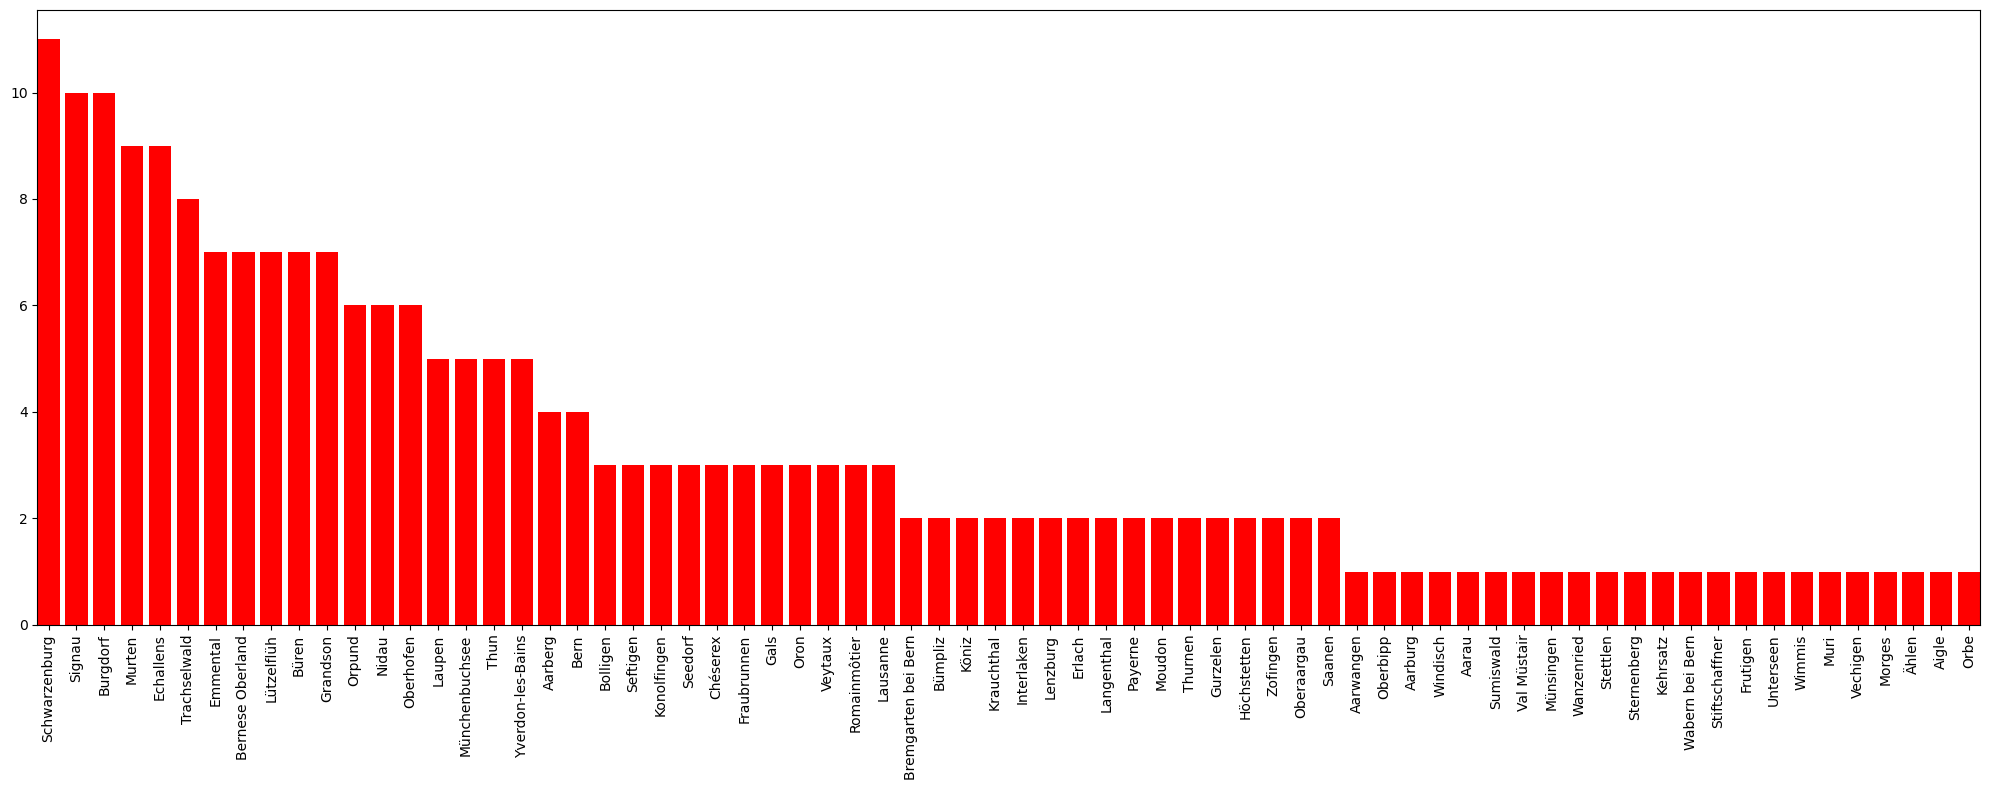

In [7]:
sums = dataset['sum_scopes'].sum()
pom = Counter(sums)
pom = pom.most_common()

csv_columns=['Scope','Frequency']
with open('summedfreq.csv','w', encoding='utf-8-sig') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(csv_columns)
    for location, count in sums.items():
        scope = location
        writer.writerow([scope, count])

plt.figure(figsize=(20,8))
plt.margins(x=0)
plt.bar(*zip(*pom),color='red')
plt.autoscale()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("frequency.png")